Anova in Python

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

import pingouin as pg

import seaborn as sns 

In [2]:
post_likes = pd.read_csv('C:/Users/spit/Desktop/math/5/class/5 post_likes.csv')

In [3]:
post_likes.head()

,id,button,likes
0,S001,red,160
1,S002,red,150
2,S003,red,150
3,S004,red,150
4,S005,red,187


In [4]:
post_likes.button.unique()

array(['red', 'green', 'blue'], dtype=object)

C:\Users\spit\AppData\Local\Temp\ipykernel_7148\2151973330.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='button', y='likes', data=post_likes, palette=['r','g','b'])


<Axes: xlabel='button', ylabel='likes'>

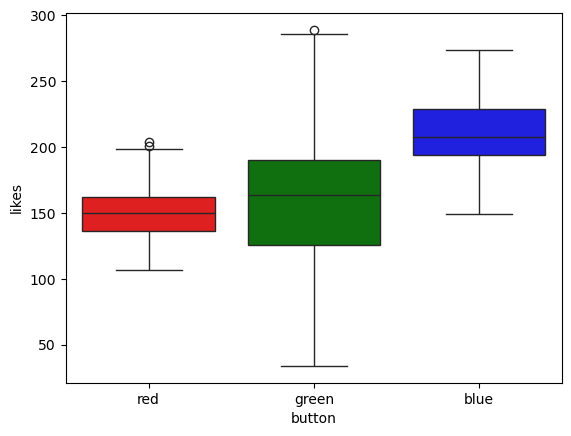

In [5]:
sns.boxplot(x='button', y='likes', data=post_likes, palette=['r','g','b'])

C:\Users\spit\AppData\Local\Temp\ipykernel_7148\3385918453.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='button', y='likes', data=post_likes, palette=['r','g','b'])


<Axes: xlabel='button', ylabel='likes'>

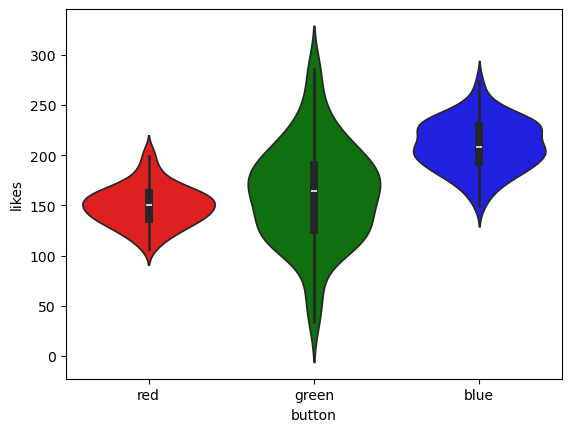

In [6]:
#показываетк какая форма у распределения
sns.violinplot(x='button', y='likes', data=post_likes, palette=['r','g','b'])

#### Три способа посчитать однофакторный ANOVA:

In [7]:
# через scipy

red = post_likes.query("button == 'red'").likes
green = post_likes.query("button == 'green'").likes
blue = post_likes.query("button == 'blue'").likes

In [8]:
ss.f_oneway(red, green, blue)

F_onewayResult(statistic=85.99631112614011, pvalue=3.4370045810218544e-30)

In [9]:
#через statsmodel

model = smf.ols(formula = "likes ~ C(button)", data=post_likes).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(button),2.0,201960.286667,100980.143333,85.996311,3.437005e-30
Residual,297.0,348748.710000,1174.238081,NaN,NaN


In [10]:
# через pingouin

pg.anova(data=post_likes, dv='likes', between='button')

,Source,ddof1,ddof2,F,p-unc,np2
0,button,2,297,85.996311,3.437005e-30,0.366728


pvalue<5 \
Стат значемы \
разница между кнопками есть

<Axes: xlabel='button', ylabel='likes'>

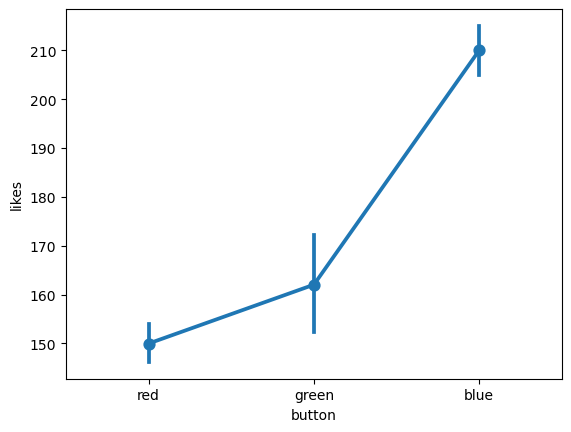

In [11]:
# среднее с доверительным интервалом

sns.pointplot(x='button', y = 'likes', data = post_likes)

Тестируем нормальность:

In [12]:
print(ss.shapiro(red))
print(ss.shapiro(green))
print(ss.shapiro(blue))

ShapiroResult(statistic=0.9881042719700356, pvalue=0.5159271795029703)
ShapiroResult(statistic=0.9887177694213334, pvalue=0.5625343189802698)
ShapiroResult(statistic=0.9937933538295788, pvalue=0.930978144920684)


In [13]:
# другой вариант

print(ss.normaltest(red))
print(ss.normaltest(green))
print(ss.normaltest(blue))

NormaltestResult(statistic=1.834358590753997, pvalue=0.3996447324611219)
NormaltestResult(statistic=0.6727062715909409, pvalue=0.7143707913703767)
NormaltestResult(statistic=0.4606964500747045, pvalue=0.7942569741771747)


In [14]:
# через pingouin

pg.normality(data = post_likes, dv="likes", group='button', method='normaltest')

,W,pval,normal
button,,,
red,1.834359,0.399645,True
green,0.672706,0.714371,True
blue,0.460696,0.794257,True


<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

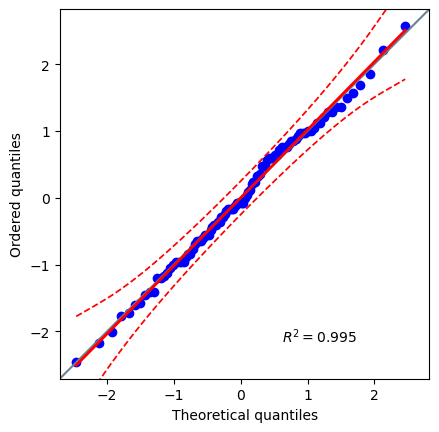

In [15]:
# нормальность через квантиль-квантиль графики. Доверительный интервал - пунктиром

pg.qqplot(blue)

Тестируем различия в дисперсиях:

In [16]:
# ченрез scipy

ss.levene(red, green, blue)

LeveneResult(statistic=35.214282435572876, pvalue=1.8886636651084242e-14)

In [17]:
# ченрез pingouin

pg.homoscedasticity(data=post_likes, dv='likes', group='button')

,W,pval,equal_var
levene,35.214282,1.888664e-14,False


In [18]:
#anova Уэлча в pingouin

pg.welch_anova(data=post_likes, dv='likes', between='button')

,Source,ddof1,ddof2,F,p-unc,np2
0,button,2,182.958104,177.856578,1.255660e-43,0.366728


In [22]:
# попареное сравнение без поправки 
pg.pairwise_ttests(data=post_likes, dv='likes', between='button')

C:\Users\spit\anaconda3\Lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,button,blue,green,False,True,8.591097,198.0,two-sided,2.561866e-15,2.025e+12,1.210357
1,button,blue,red,False,True,18.769214,198.0,two-sided,7.952330e-46,1.582e+42,2.644301
2,button,green,red,False,True,2.240189,198.0,two-sided,2.619001e-02,1.583,0.315609


In [25]:
# попареное сравнение с поправкой Бонферрони

pg.pairwise_ttests(data=post_likes, dv='likes', between='button', padjust = "bonf")

C:\Users\spit\anaconda3\Lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,button,blue,green,False,True,8.591097,198.0,two-sided,2.561866e-15,7.685599e-15,bonf,2.025e+12,1.210357
1,button,blue,red,False,True,18.769214,198.0,two-sided,7.952330e-46,2.385699e-45,bonf,1.582e+42,2.644301
2,button,green,red,False,True,2.240189,198.0,two-sided,2.619001e-02,7.857004e-02,bonf,1.583,0.315609


In [33]:
# попареное сравнение с поправкой holm

pg.pairwise_ttests(data=post_likes, dv='likes', between='button', padjust = "holm")

C:\Users\spit\anaconda3\Lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,button,blue,green,False,True,8.591097,198.0,two-sided,2.561866e-15,5.123733e-15,holm,2.025e+12,1.210357
1,button,blue,red,False,True,18.769214,198.0,two-sided,7.952330e-46,2.385699e-45,holm,1.582e+42,2.644301
2,button,green,red,False,True,2.240189,198.0,two-sided,2.619001e-02,2.619001e-02,holm,1.583,0.315609


In [36]:
#тьюки

pg.pairwise_tukey(data=post_likes, dv='likes', between='button')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,blue,green,210.03,162.02,48.01,4.846108,9.906919,1.143530e-14,1.210357
1,blue,red,210.03,149.96,60.07,4.846108,12.395514,1.143530e-14,2.644301
2,green,red,162.02,149.96,12.06,4.846108,2.488595,3.557351e-02,0.315609


In [39]:
# геймс-хоувелл. Поправка на разные дисперсии. Доверяем ему, потому что находили разницу в дисперсиях

pg.pairwise_gameshowell(data=post_likes, dv='likes', between='button')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,blue,green,210.03,162.02,48.01,5.588343,8.591097,145.583529,2.242651e-14,1.210357
1,blue,red,210.03,149.96,60.07,3.200454,18.769214,188.902921,0.000000e+00,2.644301
2,green,red,162.02,149.96,12.06,5.383475,2.240189,129.889834,6.830241e-02,0.315609
